<a href="https://colab.research.google.com/github/sanalpillai/Auto-ML/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install xgboost

In [49]:
# for outlier preprocessing
!pip install datasist

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
!pip install requests
!pip install tabulate
!pip install future

In [52]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [53]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,26 mins 29 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 25 days
H2O_cluster_name:,H2O_from_python_unknownUser_ac8az7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.161 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [54]:
data = pd.read_csv("https://raw.githubusercontent.com/sanalpillai/Auto-ML/main/Dataset/cleaned_data_cirrhosis.csv", index_col=0)

In [55]:
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [56]:
# Replace 'CL' with 'C' in the 'Status' column
data['Status'] = data['Status'].replace({'CL': 'C'})
data['Edema'] = data['Edema'].replace({'S': 'Y'})

In [57]:
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,Y,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,Y,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,C,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [58]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Count the number of NaNs in each column
nan_counts = data.isna().sum()

# Print the count of NaNs for each column
print(nan_counts)

# To only display columns that contain NaNs:
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)


N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
Series([], dtype: int64)


Checking the correlation between all features in the data

In [59]:
data.corr()

<ipython-input-59-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,-0.125934,-0.403953,-0.099322,0.430829,-0.295723,0.152368,-0.187930,-0.111453,0.147495,-0.110685,-0.362013
Age,-0.125934,1.000000,0.002362,-0.145054,-0.182350,0.034519,-0.060708,-0.139050,0.002323,-0.145948,0.113916,0.187852
Bilirubin,-0.403953,0.002362,1.000000,0.336882,-0.314177,0.403761,0.104675,0.392112,0.370330,-0.013347,0.312007,0.200314
Cholesterol,-0.099322,-0.145054,0.336882,1.000000,-0.043022,0.145910,0.157995,0.347222,0.291750,0.158641,-0.027259,0.009930
Albumin,0.430829,-0.182350,-0.314177,-0.043022,1.000000,-0.209024,-0.070010,-0.180947,-0.068509,0.156384,-0.198405,-0.302190
Copper,-0.295723,0.034519,0.403761,0.145910,-0.209024,1.000000,0.207349,0.298923,0.292236,-0.040523,0.182494,0.232149
Alk_Phos,0.152368,-0.060708,0.104675,0.157995,-0.070010,0.207349,1.000000,0.122071,0.186250,0.133398,0.073408,0.037905
SGOT,-0.187930,-0.139050,0.392112,0.347222,-0.180947,0.298923,0.122071,1.000000,0.130853,-0.094383,0.094550,0.143568
Tryglicerides,-0.111453,0.002323,0.370330,0.291750,-0.068509,0.292236,0.186250,0.130853,1.000000,0.088806,0.014831,0.099879
Platelets,0.147495,-0.145948,-0.013347,0.158641,0.156384,-0.040523,0.133398,-0.094383,0.088806,1.000000,-0.154617,-0.240671


In [60]:
print(data.columns)

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


In [61]:
#Making categories to 0 & 1
data["Status"] = data["Status"].map({"D": 0, "C": 1})
data["Drug"] = data["Drug"].map({"D-penicillamine": 0, "Placebo": 1})
data["Sex"] = data["Sex"].map({"F": 0, "M": 1})
data["Ascites"] = data["Ascites"].map({"N": 0, "Y": 1})
data["Hepatomegaly"] = data["Hepatomegaly"].map({"N": 0, "Y": 1})
data["Spiders"] = data["Spiders"].map({"N": 0, "Y": 1})
data["Edema"] = data["Edema"].map({"N": 0, "Y": 1})
# Viewing data
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,0,0,21464,0,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,1,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,0,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,0,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [62]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Count the number of NaNs in each column
nan_counts = data.isna().sum()

# Print the count of NaNs for each column
print(nan_counts)

# To only display columns that contain NaNs:
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)


N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
Series([], dtype: int64)


In [63]:
# Creating binary vaiables

data = pd.get_dummies(data)

# Normalizing the data in the columns

from sklearn import preprocessing

# Create variables to store scaled values as floats
a = data[["N_Days"]].values.astype(float)
b = data[["Age"]].values.astype(float)
c = data[["Bilirubin"]].values.astype(float)
d = data[["Cholesterol"]].values.astype(float)
e = data[["Albumin"]].values.astype(float)
f = data[["Copper"]].values.astype(float)
g = data[["Alk_Phos"]].values.astype(float)
h = data[["SGOT"]].values.astype(float)
i = data[["Tryglicerides"]].values.astype(float)
j = data[["Platelets"]].values.astype(float)
k = data[["Prothrombin"]].values.astype(float)
l = data[["Stage"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
a_scaled = min_max_scaler.fit_transform(a)
b_scaled = min_max_scaler.fit_transform(b)
c_scaled = min_max_scaler.fit_transform(c)
d_scaled = min_max_scaler.fit_transform(d)
e_scaled = min_max_scaler.fit_transform(e)
f_scaled = min_max_scaler.fit_transform(f)
g_scaled = min_max_scaler.fit_transform(g)
h_scaled = min_max_scaler.fit_transform(h)
i_scaled = min_max_scaler.fit_transform(i)
j_scaled = min_max_scaler.fit_transform(j)
k_scaled = min_max_scaler.fit_transform(k)
l_scaled = min_max_scaler.fit_transform(l)

# Run the normalizer on the dataframe
data[["N_Days"]] = pd.DataFrame(a_scaled)
data[["Age"]] = pd.DataFrame(b_scaled)
data[["Bilirubin"]] = pd.DataFrame(c_scaled)
data[["Cholesterol"]] = pd.DataFrame(d_scaled)
data[["Albumin"]] = pd.DataFrame(e_scaled)
data[["Copper"]] = pd.DataFrame(f_scaled)
data[["Alk_Phos"]] = pd.DataFrame(g_scaled)
data[["SGOT"]] = pd.DataFrame(h_scaled)
data[["Tryglicerides"]] = pd.DataFrame(i_scaled)
data[["Platelets"]] = pd.DataFrame(j_scaled)
data[["Prothrombin"]] = pd.DataFrame(k_scaled)
data[["Stage"]] = pd.DataFrame(l_scaled)

# Handling NaNs by filling them with the mean of each column
data = data.fillna(data.mean())

In [64]:
# data after normalizing and feature creation
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,0.937947,0,0,0.578364,0,1,1,1,1,0.028881,0.109970,0.813433,0.085616,0.523509,0.202298,0.097345,0.241275,0.177778,0.666667
2,0.204249,1,0,0.839597,0,0,1,1,0,0.039711,0.033837,0.567164,0.352740,0.016724,0.161871,0.038938,0.135053,0.333333,1.000000
3,0.396298,0,0,0.545664,1,0,0,0,1,0.054152,0.074924,0.216418,0.102740,0.429723,0.079554,0.104425,0.183612,0.144444,1.000000
4,0.307741,0,0,0.226748,0,0,1,1,1,0.111913,0.096073,0.585821,0.238014,0.028143,0.201439,0.069027,0.112291,0.211111,0.666667
5,0.517880,1,1,0.766481,0,0,1,1,0,0.018051,0.077341,0.753731,0.078767,0.048256,0.154676,0.053097,0.295940,0.222222,0.666667


In [65]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Count the number of NaNs in each column
nan_counts = data.isna().sum()

# Print the count of NaNs for each column
print(nan_counts)

# To only display columns that contain NaNs:
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)


N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
Series([], dtype: int64)


Creating the heat map of the correlation

<Axes: >

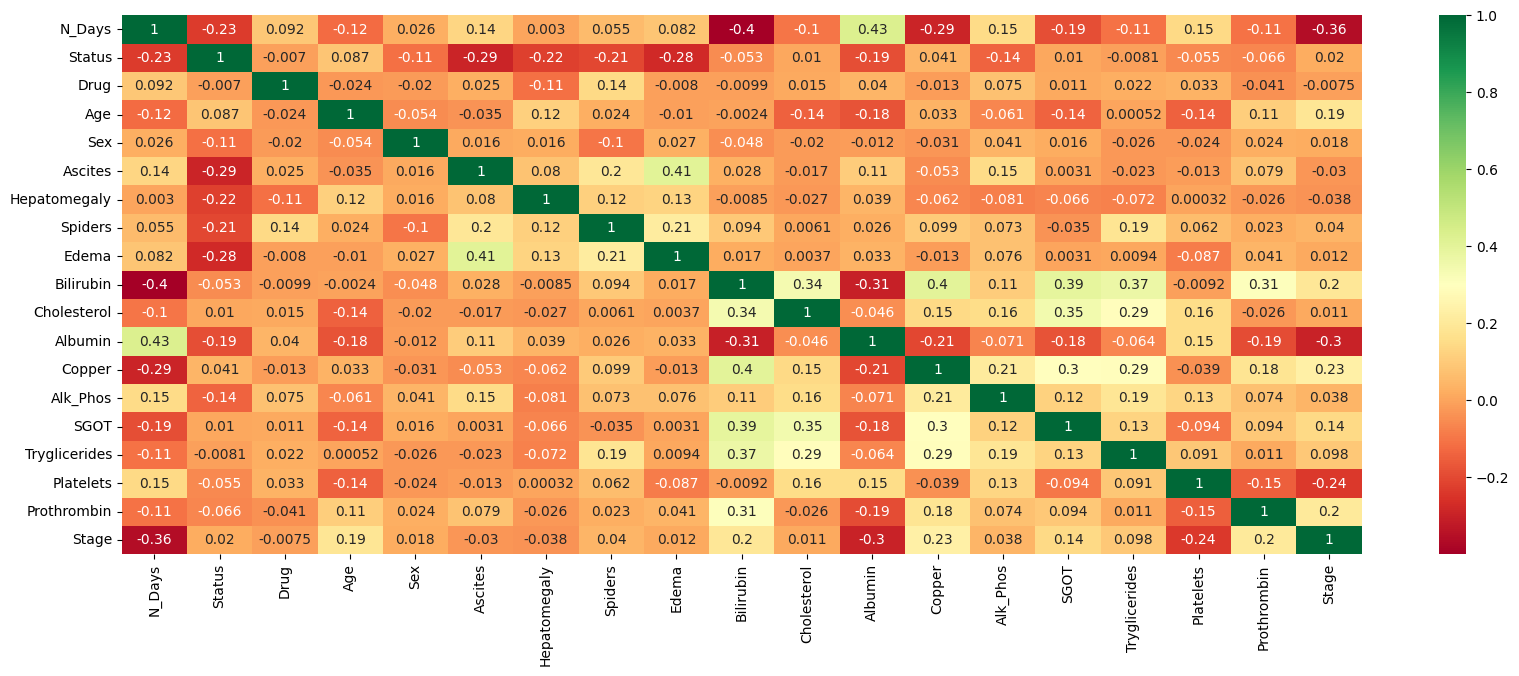

In [66]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

Identifing predictor significance


In [67]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

# Specifying the dependent variable and the list of independent variables
dependent_var = 'Stage'
independent_vars = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Adding a constant for the intercept
X = sm.add_constant(data[independent_vars])
y = data[dependent_var]

# Fitting the model
model = sm.OLS(y, X).fit()

# Printing the model summary
print(f"Model Summary for {dependent_var}:")
print(model.summary())


Model Summary for Stage:
                            OLS Regression Results                            
Dep. Variable:                  Stage   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     10.90
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.03e-17
Time:                        18:00:05   Log-Likelihood:                -23.177
No. Observations:                 418   AIC:                             70.35
Df Residuals:                     406   BIC:                             118.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7

Measuring Multicollinearity Using Variance Inflation Factor (VIF)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming 'data' is your DataFrame loaded with the cirrhosis dataset
# Replace 'column1', 'column2', etc., with your actual column names
independent_vars = [
    'N_Days', 'Age', 'Bilirubin', 'Cholesterol',
    'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Prothrombin'
]

# Ensure the DataFrame only includes the independent variables of interest
df = data[independent_vars].dropna()  # subset the dataframe for VIF calculation

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

print(vif_data)


          feature        VIF
0          N_Days   5.857855
1             Age   5.135429
2       Bilirubin   2.636913
3     Cholesterol   3.245156
4         Albumin  12.209515
5          Copper   3.212355
6        Alk_Phos   1.954088
7            SGOT   5.480371
8   Tryglicerides   4.472000
9       Platelets   5.198370
10    Prothrombin   4.206862


Regularization

In [69]:
from sklearn.model_selection import train_test_split

# Replace these with the actual column names from your dataset
independent_vars = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Assuming 'Stage' is the target variable
X = data[independent_vars]
y = data['Stage']

# Splitting data into Training 70%, Test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [70]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [71]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.2377889354609367

H2O

In [72]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [73]:
data.head()

N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0.937947,0,0,0.578364,0,1,1,1,1,0.0288809,0.10997,0.813433,0.0856164,0.523509,0.202298,0.0973451,0.241275,0.177778,0.666667
0.204249,1,0,0.839597,0,0,1,1,0,0.0397112,0.0338369,0.567164,0.35274,0.0167239,0.161871,0.0389381,0.135053,0.333333,1
0.396298,0,0,0.545664,1,0,0,0,1,0.0541516,0.0749245,0.216418,0.10274,0.429723,0.0795544,0.104425,0.183612,0.144444,1
0.307741,0,0,0.226748,0,0,1,1,1,0.111913,0.0960725,0.585821,0.238014,0.0281433,0.201439,0.0690265,0.112291,0.211111,0.666667
0.51788,1,1,0.766481,0,0,1,1,0,0.0180505,0.0773414,0.753731,0.0787671,0.0482561,0.154676,0.0530973,0.29594,0.222222,0.666667
0.376735,0,1,0.560886,0,0,1,0,0,0.0252708,0.122054,0.794776,0.0821918,0.0394153,0.0791367,0.318584,0.215478,0.0777778,0.666667
0.510097,1,1,0.513384,0,0,1,0,0,0,0.0966767,0.761194,0.0821918,0.321379,0.00471107,0.276106,0.471927,0.222222,0.666667
0.496214,0,1,0.311148,0,0,0,0,0,0.104693,0.267069,0.41791,0.128425,0.146389,0.273381,0.0973451,0.286798,0.222222,0.333333
0.00210349,0,0,0.84894,0,0,0,1,0,0.444043,0.0483384,0.291045,0.232877,0.0463406,0.280576,0.19469,0.364188,0.277778,1
0.782709,0,1,0.525982,0,1,0,1,1,0.0397112,0.0839879,0.820896,0.0719178,0.0600439,0.122302,0.0814159,0.29742,0.333333,1


In [74]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [75]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [76]:
drift_data["is_train"].table()

is_train,Count
0,99
1,319


Running AutoML for 10 base models

In [77]:
x = list(set(train.col_names) - set(["Stage"]))

In [78]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Stage", training_frame=train)

AutoML progress: |
17:50:41.646: _train param, Dropping bad and constant columns: [is_train]
17:50:44.773: _train param, Dropping bad and constant columns: [is_train]
17:50:45.408: _train param, Dropping bad and constant columns: [is_train]
17:50:46.656: _train param, Dropping bad and constant columns: [is_train]
17:50:48.586: _train param, Dropping bad and constant columns: [is_train]
17:50:50.550: _train param, Dropping bad and constant columns: [is_train]
17:50:51.338: _train param, Dropping bad and constant columns: [is_train]
17:50:52.184: _train param, Dropping bad and constant columns: [is_train]
17:50:53.293: _train param, Dropping bad and constant columns: [is_train]
17:50:54.925: _train param, Dropping bad and constant columns: [is_train]
17:50:57.445: _train param, Dropping unused columns: [is_train]
17:50:57.920: _train param, Dropping unused columns: [is_train]
18:00:07.560: New models will be added to existing leaderboard random_split@@Stage (leaderboard frame=null) with 

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240214_175041


GLM Model: summary
    family    link      regularization             lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.4035 )  nlambda = 30, lambda.max = 11.326, lambda.min = 0.4035, lambda.1se = 1.6846  18                            18                             8                       AutoML_1_20240214_175041_training_py_6_sid_8007

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06534020722877668
RMSE: 0.2556173061996716
MAE: 0.20473835871209867
RMSLE: 0.16939099941860927
Mean Residual Deviance: 0.06534020722877668
R^2: 0.24262435656551584
Null degrees of freedom: 318
Residual degrees of freedom: 300
Null deviance: 27.520724077500414
Residual deviance: 20.84352610597976
AIC: 75.0036674798217

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.07215346527592775
RMSE: 0.2686139707385447
MAE: 0.21372891176145495
RMSLE: 0.1776609112129846
Mean Residual Deviance: 0.07215346527592775
R^2: 0.16365007845711088
Null degrees of freedom: 318
Residual degrees of freedom: 300
Null deviance: 27.52842520064122
Residual deviance: 23.016955423020953
AIC: 106.64455498489582

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.212818   0.0116433   0.227238      0.196555      0.207659      0.219377      0.213259
mean_residual_deviance  0.0710829  0.00828283  0.0797234     0.0591486     0.0702237     0.0780571     0.068262
mse                     0.0710829  0.00828283  0.0797234     0.0591486     0.0702237     0.0780571     0.068262
null_deviance           5.50568    0.858358    6.33435       4.98706       4.76484       6.54261       4.89957
r2                      0.169481   0.0795843   0.194153      0.240525      0.0562431     0.23613       0.120351
residual_deviance       4.53566    0.536751    5.1023        3.78551       4.49431       4.99565       4.3005
rmse                    0.266242   0.0157269   0.282353      0.243205      0.264997      0.279387      0.26127
rmsle                   0.176096   0.0137952   0.191034      0.162596      0.17102       0.190631      0.165197

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    deviance_xval    deviance_se    alpha    iterations    training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  ---------------  -------------  -------  ------------  ------------------  -------------------  -------------------  -------------------
    2024-02-14 17:50:45  0.000 sec   1            11        19            0.0803918         0.0820254        0.00532871     0
    2024-02-14 17:50:45  0.001 sec   2            7         19            0.0780287         0.0802433        0.00505673     0
    2024-02-14 17:50:45  0.002 sec   3            4.4       19            0.0753074         0.078152         0.00470988     0
    2024-02-14 17:50:45  0.003 sec   4            2.7       19            0.0725155         0.0760073        0.00431506     0
    2024-02-14 17:50:45  0.003 sec   5            1.7       19            0.0699685         0.0741429        0.00392911     0
    2024-02-14 17:50:45  0.007 sec   6            1 